# Comparing Classification Models: sklearn Iris data

# Disclaimers
## Authorship 

This notebook has been prepared by **Hammad Zahid Ali** and modified to cope with the purpose of this class. Main modifications were inclusion of extra documentation of the functions and chunks of code, inclusions of references to 3rd part resources. If you are interested on the original file, please have a look at:
https://www.kaggle.com/hammadzahidali/comparing-classification-models-sklearn-iris-data all credits should be given to [**Hammad Zahid Ali**](https://www.kaggle.com/hammadzahidali) for his great work. 

## Liability

The material and information contained on this notebook is for general information and educational purposes only. You should not rely upon the material or information on the notebook as a basis for making any business, legal or any other decisions.

I am not be liable for any false, inaccurate, inappropriate or incomplete information presented on the notebook. Any reliance you place on such material is therefore strictly at your own risk.

## Datasets license

The **Iris Species** used in this notebook was obtained at Kaggle and originally published by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris) no personal data that could be used to identify the subjects were included on the dataset.

Sincerely,

**Adriano Barbosa**

**Steps in Applied Machine Learning:**
- Load Library
- Load Dataset to which Machine Learning Algorithm to be applied Either a) load from a CSV file or b) load from a Database
- Summarisation of Data to understand dataset (Descriptive Statistics)
- Visualisation of Data to understand dataset (Plots, Graphs etc.)
- Data pre-processing & Data transformation (split into train-test datasets)
- Application of a Machine Learning Algorithm to training dataset a) setup a ML algorithm and parameter settings b) cross validation setup with training dataset
c) training & fitting Algorithm with training Dataset
d) evaluation of trained Algorithm (or Model) and result
e) saving the trained model for future prediction
- Finalise the trained modela and make prediction

In [21]:
# Install the packages below to make sure you have all you need.

#!pip install pandas
#!pip install sklearn 
#!pip install matplotlib

# 1) Load Libraries

We will use the following libraries to conduct this practical
### Pandas
**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal. [Learn more](https://pandas.pydata.org/pandas-docs/stable/)

### Numpy
**NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

  * a powerful N-dimensional array object
  * sophisticated (broadcasting) functions
  * tools for integrating C/C++ and Fortran code
  * useful linear algebra, Fourier transform, and random number capabilities [Learn more](https://numpy.org/)
  
### Pickle
The **pickle** module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”. [Learn more](https://docs.python.org/3/library/pickle.html)

### Sklearn
**Scikit-learn** is a Python module integrating a wide range of state-of-the-art machine learning algorithms for medium-scale supervised and unsupervised problems. This package focuses on bringing machine learning to non-specialists using a general-purpose high-level language. Emphasis is put on ease of use, performance, documentation, and API consistency. It has minimal dependencies and is distributed under the simplified BSD license, encouraging its use in both academic and commercial settings.  [Learn more](https://scikit-learn.org/stable/index.html)

In [8]:
import pandas as pd
import numpy as np
import pickle as pk

# for dataset spliting
from sklearn.model_selection import train_test_split
#
from sklearn.model_selection import cross_val_score


# visualization
import matplotlib.pyplot as plt

#
from pandas.plotting import scatter_matrix

# 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



**IRIS data From UCI Machine Learning**
The goal of this exercise is to correctly classify each flower given its attributes. IRIS is a small and well understood dataset for classification problem. Here the author is going to present an end to end predictive modelling machine learning recipe for this classification project using different types of Classifier available in scikit-learn package such as Logistic Regression, Linear Discriminant Analysis, K Nearest Neighbours, Decision Tree, Naïve Bayes and Support Vector Machine.



In [9]:
# 2 LOAD DATA

data = pd.read_csv('./Iris.csv')
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [10]:
# 3 Summarization of dataset: Descriptive Stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:
# checking if any null values 
data.isnull().values.any()

False

In [12]:
# How manu classes of target col 'class'
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
# Data preprocessing

def pre_processing(data):
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']

    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest
    

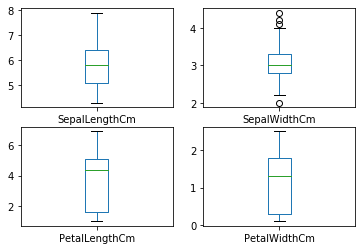

In [15]:
# 4 Data visualization

col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

data[col_names].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9422926eb8>,
      dtype=object)

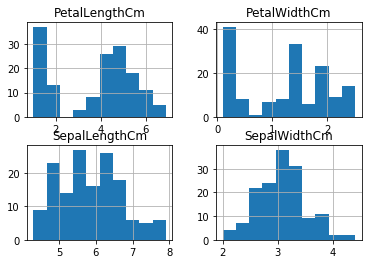

In [16]:
data[col_names].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94220b3518>,
      dtype=object)

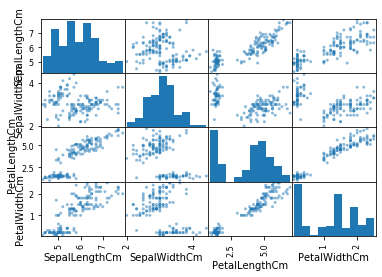

In [17]:
scatter_matrix(data[col_names])

In [18]:
# 4 Data preprocessing
xtrain,xtest, ytrain, ytest = pre_processing(data)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linea

LR 0.9399509803921569
CART 0.9399509803921569
KNN 0.9693627450980392
NB 0.9497549019607843
LDA 0.9699754901960785
SVM 0.9693627450980392
[array([0.94117647, 0.94117647, 0.9375    ]), array([0.94117647, 0.94117647, 0.9375    ]), array([0.97058824, 1.        , 0.9375    ]), array([0.97058824, 0.94117647, 0.9375    ]), array([0.97058824, 0.97058824, 0.96875   ]), array([0.97058824, 1.        , 0.9375    ])]


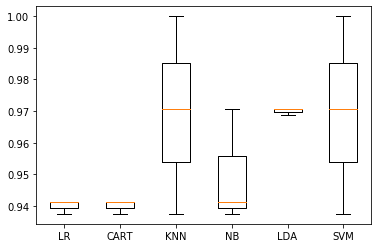

In [19]:
# Building Models for iris flower classification

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(xtrain,xtest, ytrain, ytest)

In [20]:
# Evaluating and predicting models


for name,model in models:
    trainedmodel = model.fit(xtrain,ytrain)
    
    # prediction
    ypredict = trainedmodel.predict(xtest)
    
    acc = accuracy_score(ytest,ypredict)
    classreport = classification_report(ytest,ypredict)
    confMat = confusion_matrix(ytest,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)
    


****************************LR
The accuracy: 0.96
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

The Confusion Matrix:
 [[18  0  0]
 [ 0 15  0]
 [ 0  2 15]]

****************************CART
The accuracy: 0.88
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.80      0.80      0.80        15
 Iris-virginica       0.82      0.82      0.82        17

       accuracy                           0.88        50
      macro avg       0.87      0.87      0.87        50
   weighted avg       0.88      0.

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**From above it seems svm is winner with some leading results.**